In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt


input_data = Path("../input_data/09").read_text()

In [2]:
height_matrix_as_lists = [[int(x) for x in row] for row in input_data.split("\n")]

In [3]:
height_matrix = np.array(height_matrix_as_lists)

In [4]:
display(height_matrix)
height_matrix.shape

array([[3, 5, 6, ..., 9, 2, 1],
       [2, 4, 5, ..., 5, 3, 0],
       [0, 1, 9, ..., 9, 9, 1],
       ...,
       [3, 4, 9, ..., 8, 9, 9],
       [6, 5, 6, ..., 6, 7, 8],
       [9, 7, 9, ..., 7, 8, 9]])

(100, 100)

In [5]:
low_points = []
for x in range(height_matrix.shape[0]):
    for y in range(height_matrix.shape[1]):
        main_position = [x, y]
        other_positions_all = sorted([
            [x-1, y-1], [x+0, y-1], [x+1, y-1],
            [x-1, y+0],  [x+1, y+0],
            [x-1, y+1], [x+0, y+1], [x+1, y+1]], key=lambda x:x[0])
        other_positions_valid = sorted([[x1, y1] for x1, y1 in other_positions_all if 0 <= x1 < 100 and 0 <= y1 < 100], key=lambda x:x[0])
        main_depth = height_matrix[x, y]
        lowest = True

        for other_x, other_y in other_positions_valid:

            other_depth = height_matrix[other_x, other_y]
            if other_depth <= main_depth:
                lowest = False
                break
                
        if lowest:
            low_points.append([x, y])



print(low_points)
sum([1 + height_matrix[x, y] for x, y in low_points])

[[0, 43], [0, 84], [1, 6], [1, 19], [1, 59], [1, 67], [1, 99], [2, 0], [2, 13], [2, 32], [2, 53], [3, 18], [3, 77], [3, 92], [4, 25], [4, 99], [5, 38], [5, 63], [5, 84], [6, 48], [7, 3], [7, 14], [7, 19], [7, 87], [8, 56], [8, 72], [8, 78], [9, 97], [10, 29], [10, 37], [10, 44], [10, 50], [11, 11], [11, 80], [11, 89], [12, 15], [13, 74], [14, 20], [14, 56], [14, 64], [15, 6], [15, 34], [15, 83], [15, 94], [16, 44], [16, 69], [16, 77], [16, 99], [17, 50], [17, 89], [18, 0], [18, 13], [18, 22], [19, 74], [20, 95], [21, 9], [21, 29], [21, 60], [22, 68], [23, 1], [23, 20], [23, 38], [23, 81], [24, 16], [24, 55], [24, 73], [26, 9], [26, 25], [26, 48], [26, 65], [26, 88], [28, 39], [28, 98], [29, 3], [29, 92], [30, 29], [30, 47], [31, 22], [31, 72], [32, 44], [32, 95], [33, 36], [33, 53], [33, 65], [33, 78], [33, 87], [34, 13], [34, 20], [34, 60], [35, 0], [35, 28], [36, 91], [36, 99], [37, 47], [38, 20], [39, 8], [39, 58], [39, 72], [40, 5], [40, 13], [40, 23], [40, 86], [41, 33], [41, 41],

600

In [18]:
exhaustive_pools = []
claimed_postitions = set()
for x in range(height_matrix.shape[0]):
    for y in range(height_matrix.shape[1]):
        if (x, y) in claimed_postitions or height_matrix[x, y] == 9:
            continue
        else:
            # Explore pool from here
            claimed_postitions.add((x, y))
            fringe = set()
            fringe.add((x, y))

            current_pool = set()
            current_pool.add((x, y),)

            while fringe and (next_node := fringe.pop()):
                next_x, next_y = next_node
                claimed_postitions.add((next_x, next_y))
                current_pool.add((next_x, next_y))

                other_positions_all = [
                    [next_x+0, next_y-1],  # up
                    [next_x-1, next_y+0],  # left
                    [next_x+1, next_y+0],  # right
                    [next_x+0, next_y+1],  # down
                ]
                other_positions_valid = [(x1, y1) for x1, y1 in other_positions_all if 0 <= x1 < 100 and 0 <= y1 < 100 and (x1, y1) not in claimed_postitions]
                for other_x, other_y in other_positions_valid:
                    if height_matrix[other_x, other_y] != 9:
                        fringe.add((other_x, other_y))
                        # claimed_postitions.add(other_x, other_y)
                        # current_pool.add((other_x, other_y))
            print(f"Found pool of size ({len(current_pool)})")
            exhaustive_pools.append(current_pool)

Found pool of size (11)
Found pool of size (4)
Found pool of size (29)
Found pool of size (9)
Found pool of size (50)
Found pool of size (35)
Found pool of size (28)
Found pool of size (30)
Found pool of size (6)
Found pool of size (45)
Found pool of size (21)
Found pool of size (51)
Found pool of size (8)
Found pool of size (61)
Found pool of size (6)
Found pool of size (58)
Found pool of size (51)
Found pool of size (12)
Found pool of size (47)
Found pool of size (2)
Found pool of size (96)
Found pool of size (11)
Found pool of size (45)
Found pool of size (14)
Found pool of size (38)
Found pool of size (18)
Found pool of size (2)
Found pool of size (9)
Found pool of size (16)
Found pool of size (7)
Found pool of size (11)
Found pool of size (19)
Found pool of size (18)
Found pool of size (17)
Found pool of size (55)
Found pool of size (20)
Found pool of size (50)
Found pool of size (29)
Found pool of size (67)
Found pool of size (10)
Found pool of size (32)
Found pool of size (2)
Fo

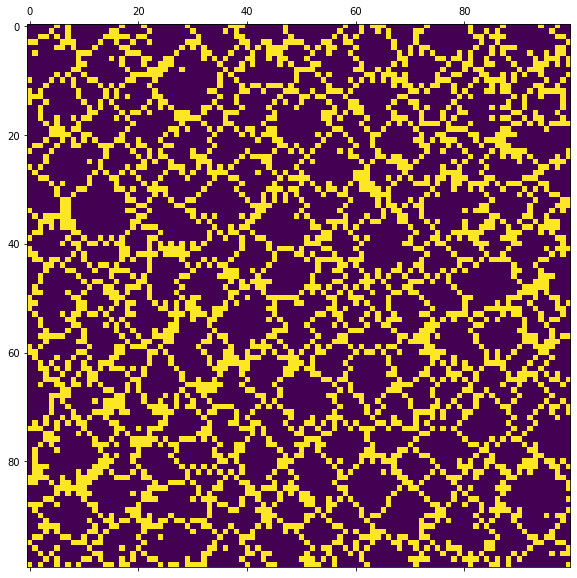

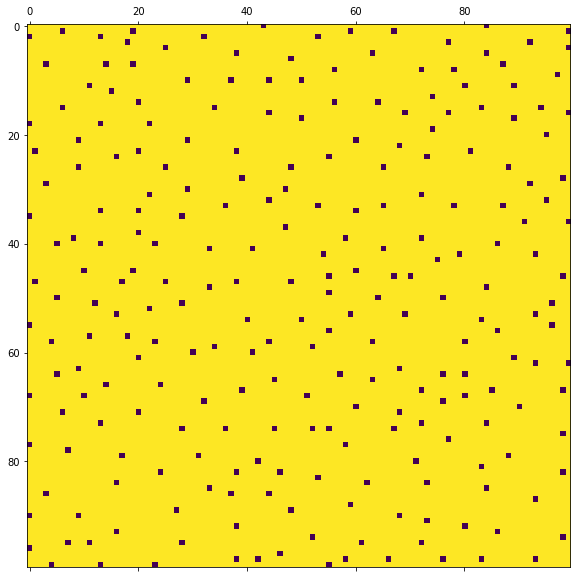

In [19]:
one_pool = np.ones((100, 100))
for x in range(100):
    for y in range(100):
        one_pool[x,y] = 100 if height_matrix[x, y] == 9 else 0
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(one_pool)

deepest_pool = np.zeros((100, 100))
for x, y in low_points:
    deepest_pool[x,y ] = -10

fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(deepest_pool)

Pool valid! (105)
Pool valid! (98)
Pool valid! (96)
Pool valid! (89)
Pool valid! (84)
Pool valid! (79)
Pool valid! (79)
Pool valid! (79)
Pool valid! (78)
Pool valid! (76)
Pool valid! (74)
Pool valid! (73)
Pool valid! (71)
Pool valid! (71)
Pool valid! (71)
Pool valid! (69)
Pool valid! (69)
Pool valid! (68)
Pool valid! (67)
Pool valid! (67)
Pool valid! (67)
Pool valid! (66)
Pool valid! (64)
Pool valid! (62)
Pool valid! (61)
Pool valid! (61)
Pool valid! (61)
Pool valid! (60)
Pool valid! (59)
Pool valid! (59)
Pool valid! (59)
Pool valid! (59)
Pool valid! (58)
Pool valid! (57)
Pool valid! (56)
Pool valid! (55)
Pool valid! (55)
Pool valid! (54)
Pool valid! (51)
Pool valid! (51)
Pool valid! (51)
Pool valid! (51)
Pool valid! (51)
Pool valid! (51)
Pool valid! (50)
Pool valid! (50)
Pool valid! (50)
Pool valid! (50)
Pool valid! (49)
Pool valid! (48)
Pool valid! (47)
Pool valid! (47)
Pool valid! (47)
Pool valid! (46)
Pool valid! (45)
Pool valid! (45)
Pool valid! (45)
Pool valid! (44)
Pool valid! (

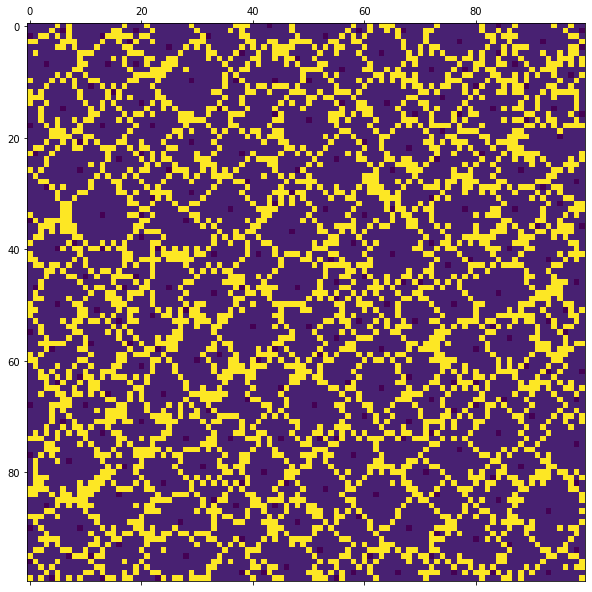

In [20]:

empty_pool = np.zeros((100, 100))

master_pools = []

for pool in sorted([pool for pool in exhaustive_pools], key=lambda x: -len(x)):
    pool_valid = True
    for x, y in pool:
        if empty_pool[x,y] > 0:
            print(f"Invalidating {empty_pool[x, y]}")
            pool_valid = False
        empty_pool[x,y] += 1
    if pool_valid:
        print(f"Pool valid! ({len(pool)})")
        master_pools.append(pool)
    else:
        print(f"invalid pool ({len(pool)})")
# plt.matshow(empty_pool)
# empty_pool[0:10, 0:10] = 0


fig, ax = plt.subplots(figsize=(10,50))
ax.matshow(empty_pool + one_pool + deepest_pool)

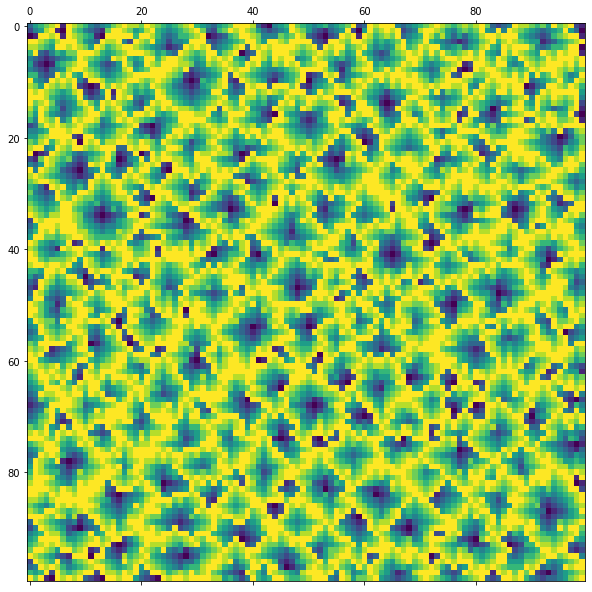

In [21]:
fig, ax = plt.subplots(figsize=(10,50))
ax.matshow(height_matrix)

In [22]:
from collections import Counter

c = Counter(height_matrix.flatten())
nine_occurences = c[9]
pools_sum = sum([len(pool) for pool in master_pools])
total = nine_occurences + pools_sum
print(f"{nine_occurences=}, {pools_sum=}, {total=}, {(sum(c.values()))=}")

nine_occurences=2862, pools_sum=7138, total=10000, (sum(c.values()))=10000


In [17]:
top_3_pools = sorted([len(pool) for pool in master_pools])[-3:]
total = 1
for pool_size in top_3_pools:
    total *= pool_size

total

987840